In [93]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import and_


In [94]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [95]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [96]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [97]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [98]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [99]:
# Save references to each table
measurement = Base.classes.measurement 
station = Base.classes.station

In [100]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [101]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()

print(recent_date)

('2017-08-23',)


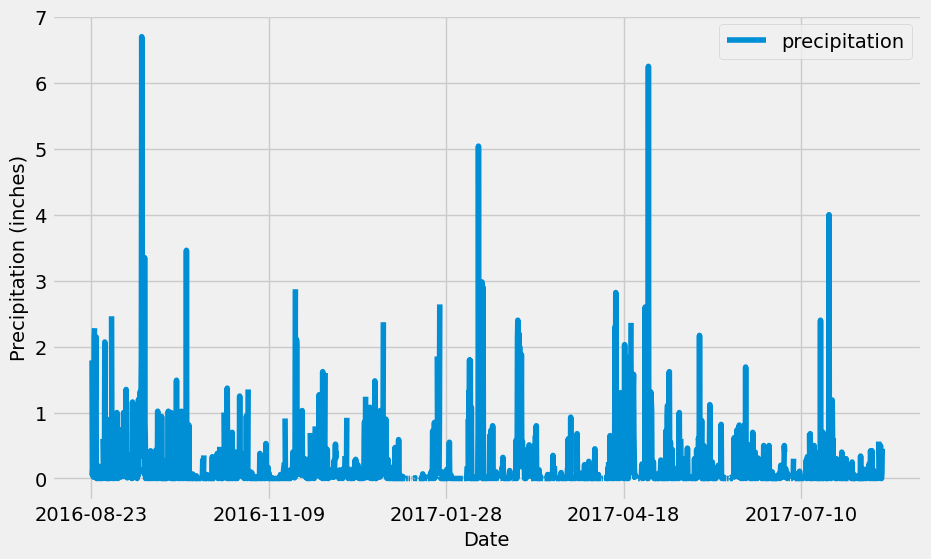

In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date_one = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date>=date_one).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
dataframe= pd.DataFrame(precipitation_scores, columns=["date", "precipitation"])

# Sort the dataframe by date
sort_df= dataframe.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot(x='date', y='precipitation', kind='line', figsize=(10, 6))

plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

In [103]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [104]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(func.count(station.station)).scalar()

number_stations

9

In [105]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
                         group_by(measurement.station).\
                         order_by(func.count(measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [106]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = "USC00519281"

calculation_list = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
          filter(measurement.station == most_active_station_id).all()

calculation_list

[(54.0, 85.0, 71.66378066378067)]

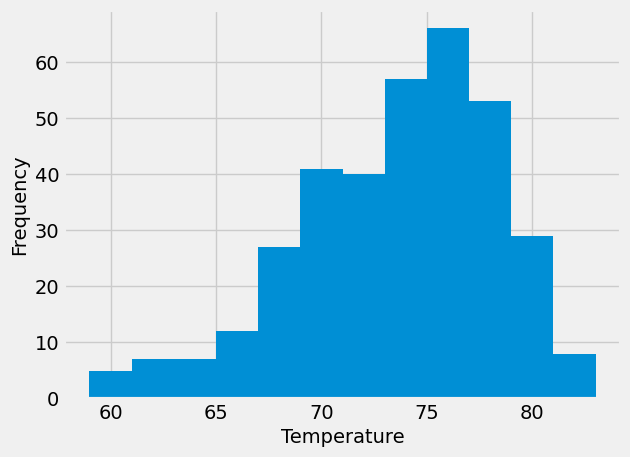

In [109]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_one = dt.date(2017, 8, 23) - dt.timedelta(days=365)
most_active_station_id = "USC00519281"


last_12_months = session.query(measurement.tobs).filter(and_(measurement.station == most_active_station_id, measurement.date >= date_one)).all()


temperatures = [temp[0] for temp in last_12_months]


plt.hist(temperatures, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [110]:
# Close Session
session.close()